# Food Delivery Time Prediction

In the rapidly evolving food delivery industry, companies like **Zomato** and **Swiggy** rely heavily on accurate delivery time estimates to maintain transparency and enhance customer satisfaction. Reliable time predictions not only improve user experience but also optimize resource allocation and operational efficiency for delivery services.

This project focuses on building a **Machine Learning model to predict food delivery times** using historical data. The primary objective is to forecast the expected delivery duration based on factors such as order placement time, distance, and real-world conditions like traffic and weather (if available).

We utilize the [Food Delivery Dataset by Gaurav Malik on Kaggle](https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset) as the foundation for this work. This dataset captures key features influencing delivery logistics, allowing us to train a regression model capable of learning from previous delivery patterns.

Using **Python**, we will implement a complete machine learning pipeline — including data preprocessing, feature engineering, model training, and evaluation — with models ranging from basic linear regressors to more sophisticated techniques. The ultimate goal is to build a model that accurately estimates delivery time and can be adapted for real-time deployment in production systems.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

In [2]:
df = pd.read_csv('deliverytime.txt')
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30

In [3]:
df.shape

(45593, 11)

In [4]:
df.describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000                 4.700000            18.546947   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.898497                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Time_taken(min)  
count                 45593.000000     45593.000000  
mean                     70.845702        26.294607  
std                      21.118812         9.383806  
min                       0.010000        10.000000  
25%                      73.280000        19.000000  
50%                      76.002574        26.000000  
75%                      78.107044        32.000000  
max                      88.563452        54.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [6]:
# checking for null values
df.isnull().sum()


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [7]:
# checking for duplicate values
df.duplicated().sum()



0

In [8]:

max_display = 10  # Maximum number of unique values to display
for col in df.columns:
    unique_vals = df[col].unique()
    
    print(f"Column: {col}")
    
    print(f" Unique Count: {len(unique_vals)}")
    print(f" Unique Values (first {min(len(unique_vals), max_display)}): {unique_vals[:max_display]}")
    print("-" * 50)


Column: ID
 Unique Count: 45451
 Unique Values (first 10): ['4607' 'B379' '5D6D' '7A6A' '70A2' '9BB4' '95B4' '9EB2' '1102' 'CDCD']
--------------------------------------------------
Column: Delivery_person_ID
 Unique Count: 1320
 Unique Values (first 10): ['INDORES13DEL02' 'BANGRES18DEL02' 'BANGRES19DEL01' 'COIMBRES13DEL02'
 'CHENRES12DEL01' 'HYDRES09DEL03' 'RANCHIRES15DEL01' 'MYSRES15DEL02'
 'HYDRES05DEL02' 'DEHRES17DEL01']
--------------------------------------------------
Column: Delivery_person_Age
 Unique Count: 22
 Unique Values (first 10): [37 34 23 38 32 22 33 35 36 21]
--------------------------------------------------
Column: Delivery_person_Ratings
 Unique Count: 28
 Unique Values (first 10): [4.9 4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.1]
--------------------------------------------------
Column: Restaurant_latitude
 Unique Count: 657
 Unique Values (first 10): [22.745049 12.913041 12.914264 11.003669 12.972793 17.431668 23.369746
 12.352058 17.433809 30.327968]
-----------------

# Calculating Distance Between Two Latitudes and Longitudes


In food delivery time prediction, one of the most significant features is the actual distance between the restaurant and the customer's location. However, since the dataset provides GPS coordinates (latitude and longitude), we cannot directly use them in modeling. Instead, we need to convert these coordinates into a measurable real-world distance.

The Haversine formula enables us to compute the great-circle distance between two points on the surface of the Earth, giving us a more accurate representation of the distance traveled than simple Euclidean formulas.

In [9]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

In [10]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6171  # Radius of the Earth in kilometers
    
    # convert degrees to radians
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c  # Distance in kilometers

# Apply Vectorized fuction to calculate distance
df['distance'] = haversine_distance(
    df['Restaurant_latitude'], df['Restaurant_longitude'],
    df['Delivery_location_latitude'], df['Delivery_location_longitude']
)


In [11]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0                    75.912471        Snack      motorcycle                24   
1                    77.813237        Snack         scooter                33   
2                    77.688400       Drinks      motorcycle                26   
3                    77.026494       Buffet      motorcycle                21   
4                    80.289982        Snack         scooter                30   

    distance  
0   2.930183  
1  19.549923  
2   1.504013  
3   7.545843  
4   6.015188

## 📊 Exploratory Data Analysis: Visualizations

Visualizing the dataset helps uncover patterns, outliers, and relationships between variables, which can significantly influence feature engineering and model performance.

---

 1. Distribution of Delivery Time

In [12]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)', 'distance'],
      dtype='object')

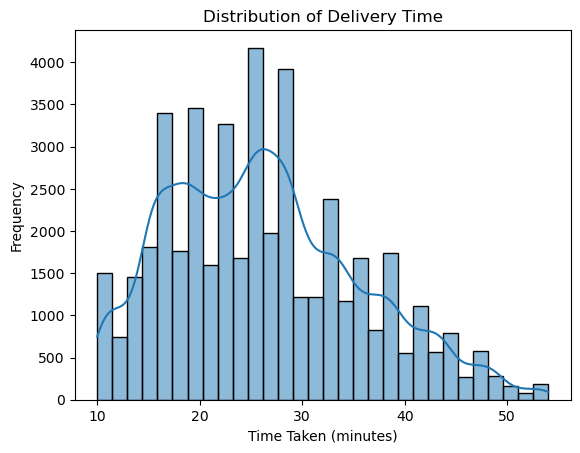

In [13]:
sns.histplot(df['Time_taken(min)'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Extract the data
x = df['Time_taken(min)']

# Calculate KDE
kde = gaussian_kde(x)
x_range = np.linspace(x.min(), x.max(), 500)
kde_values = kde(x_range)

# Create histogram
hist = go.Histogram(
    x=x,
    nbinsx=30,
    name='Histogram',
    opacity=0.75,
    marker=dict(color='lightblue'),
    histnorm='probability density'  # Match units with KDE
)

# Create KDE line
kde_line = go.Scatter(
    x=x_range,
    y=kde_values,
    mode='lines',
    name='KDE Curve',
    line=dict(color='darkblue', width=2)
)

# Combine plots
fig = go.Figure(data=[hist, kde_line])
fig.update_layout(
    title='Distribution of Delivery Time with KDE Curve',
    xaxis_title='Time Taken (minutes)',
    yaxis_title='Density',
    bargap=0.05
)

fig.show()


### Interpretation: Distribution of Delivery Time

The distribution of delivery time is **right-skewed**, indicating that **most deliveries are completed within 20 to 30 minutes**, with the **highest frequency centered around 25–30 minutes**. This suggests that quick deliveries are the norm in the dataset.

However, there is a **long tail** extending beyond 50 minutes, reflecting a smaller proportion of deliveries that take significantly longer — likely due to factors such as:
- **Longer travel distances**
- **Traffic congestion**
- **Order complexity or preparation time**
- **Vehicle or rider constraints**

The presence of **multiple small peaks** may point to **distinct delivery zones**, **types of orders**, or **operational patterns**, such as peak hours or urban vs. rural deliveries.

2. Delivery Time vs Age of Delivery Person

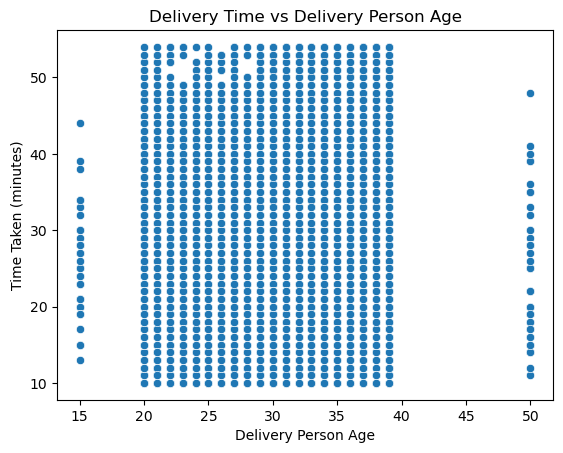

In [15]:
sns.scatterplot(x= 'Delivery_person_Age', y= 'Time_taken(min)', data= df)
plt.title('Delivery Time vs Delivery Person Age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (minutes)')
plt.show()


In [16]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)', 'distance'],
      dtype='object')

In [17]:
figure = px.scatter(data_frame= df, x= 'Delivery_person_Age', y= 'Time_taken(min)', size= 'Time_taken(min)', color= 'distance', trendline= 'ols', title= 'Relationship between Delivery Person Age and Time Taken')
figure.show()

### Interpretation: Delivery Time vs Age of Delivery Person

The scatter plot reveals a **linear relationship** between the **delivery person's age** and the **time taken to deliver food**. Specifically, it shows that **younger delivery partners tend to deliver faster**, while **older delivery partners generally take more time**.

This trend may be attributed to factors such as:
- **Higher physical agility or speed** in younger individuals
- **Familiarity with technology and navigation tools**
- **Faster handling or route execution under pressure**

The pattern suggests that age could be a **predictive feature** in modeling delivery time, although it's likely influenced by external factors like **vehicle type**, **delivery location**, and **traffic conditions**. Still, the observed trend is clear and may reflect real-world delivery performance dynamics.


3. Delivery Time by Delivery Person Rating

In [18]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)', 'distance'],
      dtype='object')

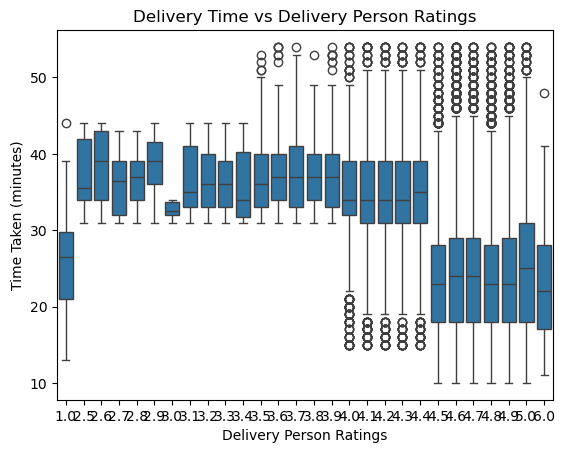

In [19]:
sns.boxplot(x= 'Delivery_person_Ratings', y= 'Time_taken(min)', data= df)
plt.title('Delivery Time vs Delivery Person Ratings')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken (minutes)')
plt.show()

In [20]:
fig = px.box(df, x= 'Delivery_person_Ratings', y='Time_taken(min)', title='Delivery Time vs Delivery Person Ratings')
fig.show()

### Interpretation: Delivery Time vs Delivery Person Ratings

The visualization shows that **shorter delivery times are generally associated with higher delivery partner ratings**, indicating a positive relationship between performance and customer satisfaction. Most delivery partners with **ratings between 4.0 and 5.0** tend to complete deliveries faster.

However, there are notable **outliers**:
- A few delivery partners with **ratings as low as 1 or as high as 6** show unexpectedly long delivery times.
- These anomalies may indicate issues unrelated to delivery speed, such as **customer bias**, **service quality**, or **data entry errors**.

These observations suggest that while ratings can be a useful performance proxy, **they are not purely driven by delivery time** and may require **further investigation or data cleaning**.


4. Delivery Time by Type of Order

In [21]:
df.Type_of_order.unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

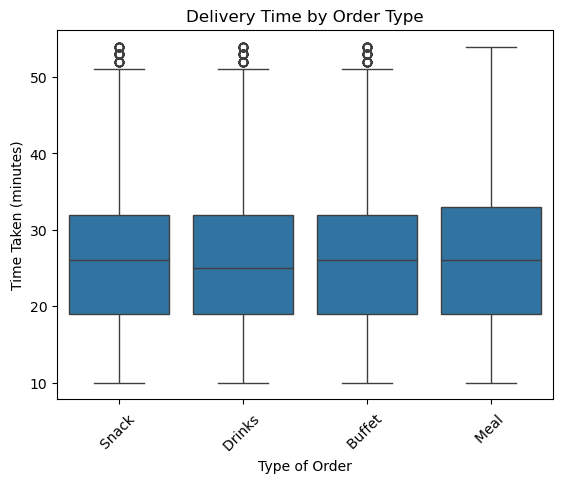

In [22]:
sns.boxplot(x= 'Type_of_order', y= 'Time_taken(min)', data= df)
plt.title('Delivery Time by Order Type')
plt.xticks(rotation=45)
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (minutes)')
plt.show()

In [23]:
fig = px.box(df, x= 'Type_of_order', y= 'Time_taken(min)', title='Delivery Time by Order Type')
fig.show()

### Interpretation: Delivery Time by Type of Order

The boxplot comparing delivery time across different order types shows that **there is no significant variation in delivery times based on the type of order**. Most order types exhibit a similar median delivery duration, and the overall spread of times is consistent across categories.

This suggests that **order type does not play a major role** in determining how long a delivery takes. 

However, any subtle differences or outliers may still reflect individual restaurant handling times or packaging complexity and could be explored further if needed.


5. Delivery Time by Type of Vehicle

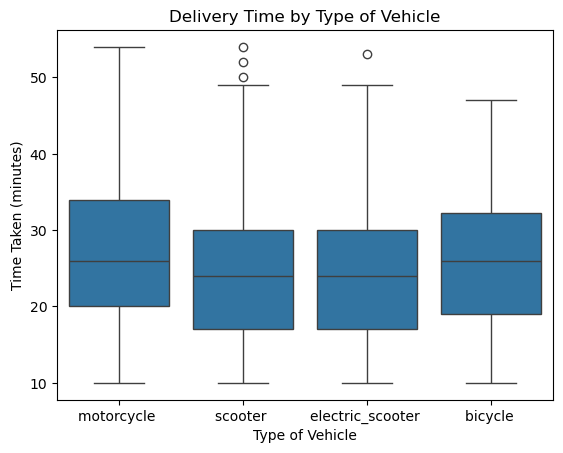

In [24]:
sns.boxplot(x= 'Type_of_vehicle', y= 'Time_taken(min)', data= df)
plt.title('Delivery Time by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Time Taken (minutes)')
plt.show()